In [1]:
# Data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Machine Learning - Preprocessing and models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract features and labels
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_val_scaled = scaler.transform(X_val.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

C:\Users\Boure\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def evaluate_model(model, X, y_true, title='Confusion Matrix'):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)
    plt.show()

Accuracy: 0.9464285714285714


<Figure size 800x800 with 0 Axes>

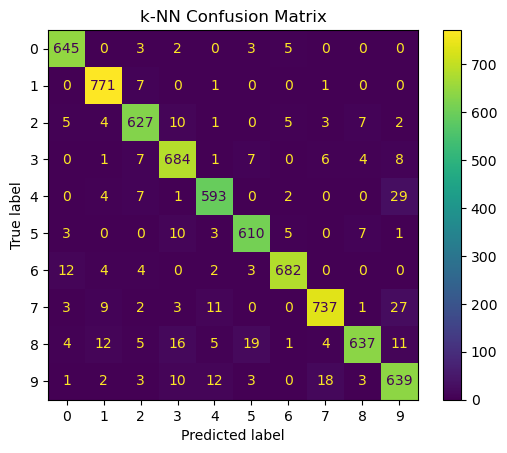

In [4]:
# Initialize and train the k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)

# Evaluate the k-NN classifier
evaluate_model(knn_clf, X_val_scaled, y_val, title='k-NN Confusion Matrix')

Accuracy: 0.9601428571428572


<Figure size 800x800 with 0 Axes>

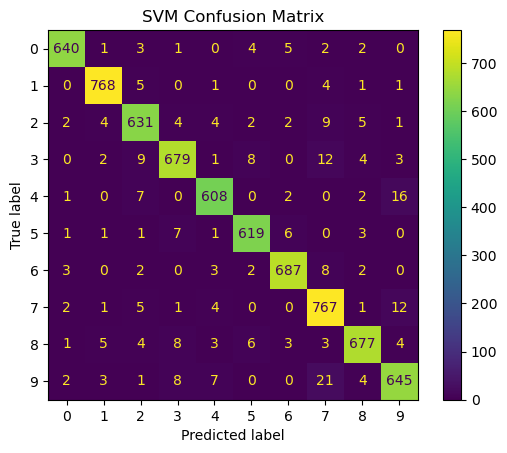

In [5]:
# Initialize and train the SVM classifier
svm_clf = SVC(kernel='rbf', C=1, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

# Evaluate the SVM classifier
evaluate_model(svm_clf, X_val_scaled, y_val, title='SVM Confusion Matrix')

Accuracy: 0.9651428571428572


<Figure size 800x800 with 0 Axes>

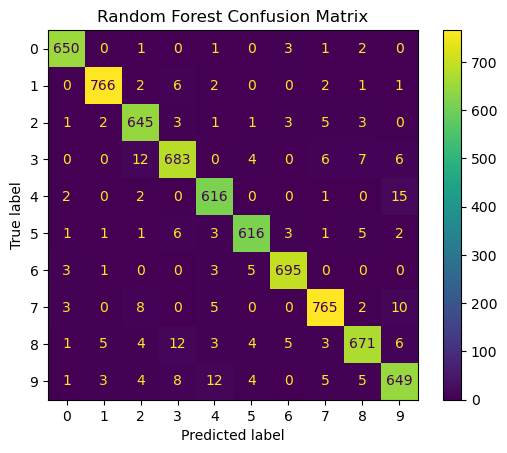

In [6]:
# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_scaled, y_train)

# Evaluate the Random Forest classifier
evaluate_model(rf_clf, X_val_scaled, y_val, title='Random Forest Confusion Matrix')

## Model Analysis Summary

Upon detailed analysis of the confusion matrices for the three models applied to the MNIST dataset, we observe:

1. **k-Nearest Neighbors (k-NN):** This model achieved a commendable accuracy of 94.64%. It showed slight confusion mainly between digits that share visual similarities, such as 5 and 8. However, it managed to maintain high precision and recall across most digits, making it a reliable model for classification tasks that require interpretability.

2. **Support Vector Machine (SVM):** Demonstrated superior performance, with an accuracy of 96.01%. The SVM model was particularly effective in distinguishing between digits with close resemblance, such as 3 and 8 or 4 and 9, . This model showed a balanced classification with high precision and recall values, indicating a strong ability to minimize both false positives and false negatives.

3. **Random Forest Classifier:** Achieving the highest accuracy of 96.51%. It showcased an exceptional balance in classification accuracy across all digits, including those that are often confused with each other like 4 and 9 or 7 and 1. The ensemble method used by the Random Forest Classifier, which aggregates the predictions of multiple decision trees, contributes to its overall accuracy and generalization capability. This model  maintained low misclassification rates for similar-looking digits, demonstrating its efficiency in a wide range of scenarios.

The Random Forest Classifier, with its comprehensive approach to handling digit classification, emerged as the best choice among the three. Its ability to maintain high accuracy while effectively managing the classification of visually similar digits suggests it as the preferable model for future enhancements and applications requiring nuanced digit recognition.


## 8. Save the model

In [8]:
from joblib import dump

#`rf_clf` is the trained Random Forest model
dump(rf_clf, 'rf_model.joblib')

['rf_model.joblib']

## 9. Predicted digit

Predicted digit: 8


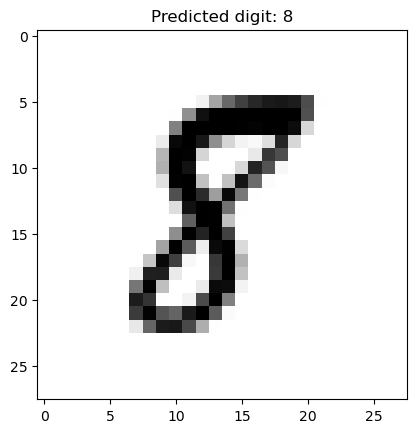

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

# Define a function for image preprocessing
def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 28x28 pixels, as expected by the model
    img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Determine if the image needs to be inverted
    # If the image is mostly dark (assumed to have black background), invert it
    if np.mean(img_resized) < 127:
        img_inverted = 255 - img_resized
    else:
        img_inverted = img_resized
    
    # Normalize pixel values to the range [0, 1]
    img_normalized = img_inverted / 255.0
    
    # Flatten the image to a 1D array for the model
    img_flattened = img_normalized.flatten().reshape(1, -1)
    return img_flattened

# Define the path to the image
image_path = 'C:/Users/Boure/Pictures/Saved Pictures/IMG_PR.png'

# Preprocess the image
processed_img = preprocess_image(image_path)

# Load the trained Random Forest model
rf_model = load('rf_model.joblib')

# Predict the digit using the preprocessed image
prediction = rf_model.predict(processed_img)
print(f"Predicted digit: {prediction[0]}")

# Display the processed image
plt.imshow(processed_img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {prediction[0]}")
plt.show()
